## **Logistic Regression With ROC curve and ROC AUC Score**

In [18]:
# roc curve and auc 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
X,y = make_classification(n_samples= 1000, n_classes=2, random_state=1) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.25, random_state=42)

In [21]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
# Lets create a basic logistic model
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
# Prediction based on probabability 
model_prob = model.predict_proba(X_test)
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [24]:
# Lets focus on the positive outcome 
model_prob = model_prob[:,1]

In [25]:
# Lets calculate the scores 
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [26]:
# Calculate ROC Curves 
dummy_fpr, dummy_tpr,_ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds= roc_curve(y_test, model_prob)

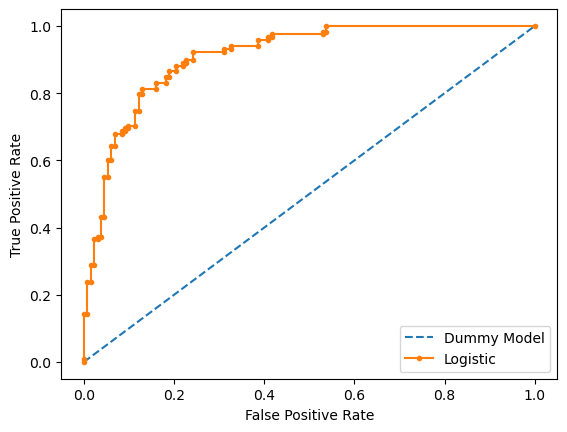

In [27]:
# plot the roc curve for the model 
plt.plot(dummy_fpr,dummy_tpr, linestyle="--",label="Dummy Model")
plt.plot(model_fpr,model_tpr, marker=".",label="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

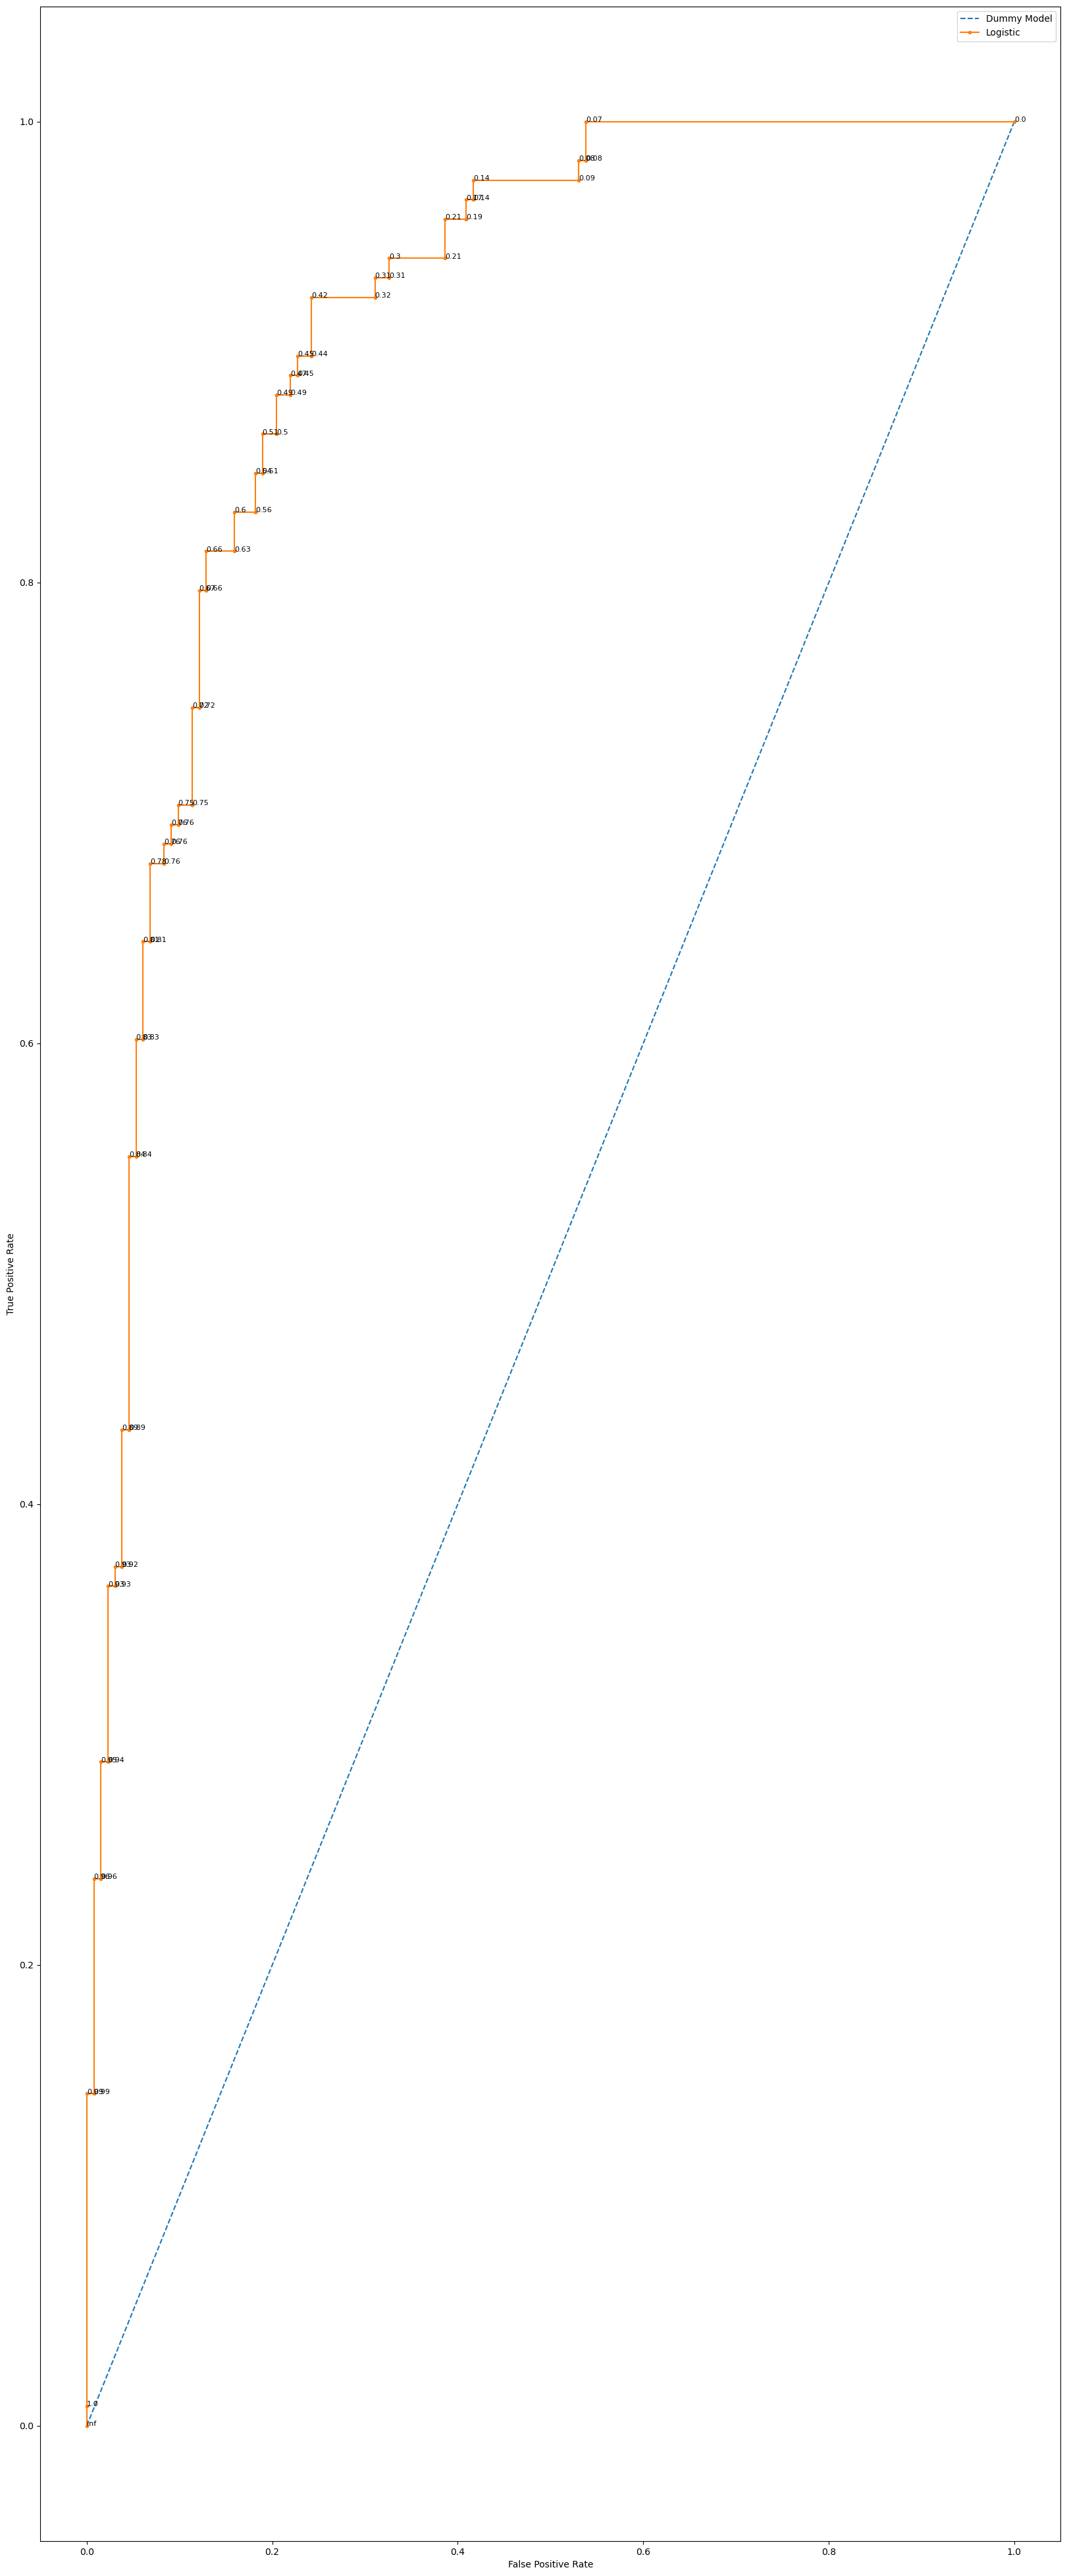

In [31]:
fig, ax = plt.subplots(figsize=(20, 50))

# Plot ROC curves
ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic")

# Annotate thresholds
for fpr, tpr, thr in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f"{np.round(thr, 2)}", xy=(fpr, tpr), fontsize=8)

# Labels and legend
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()